<a href="https://colab.research.google.com/github/renad30/KAUST-ACADEMY-stage2/blob/main/day3_NN_Pytorch_MNIST_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

In [ ]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install torch
%pip install matplotlib
%pip install torchvision

clear_output()

In [1]:
import torch

import torch.nn as nn

from torchvision.datasets import MNIST # the dataset is fetched from MINSIT
from torch.utils.data import DataLoader
from torch.optim import Adam

from torchvision.transforms.functional import to_tensor

import matplotlib.pyplot as plt

#Contents:

1. Implementation of 1-2 layer NN fin pytorch which classifies MNIST dataset

About MNIST:

the dataset consists of images of 28x28 size. The image each contains a handwritten digit from 0 to 9. Our model needs to take this image and classify it to the correct digit.


You need to know:

1. **pytorch** (for impelementation)
2. a little bit of **matplotlib** (for visualization)


Good to have knowledge of:

1. torch dataset and dataloader

In [2]:
# MNIST function fetches the MNIST dataset. Without any transform param, the returned object is a Pillow image but we want to convert it to numerical form
# that is to say, a numpy array/torch tensor

# to_tensor is used to avoid errors when creating data loader later. we'll convert them to numpy arrays when the time comes
#train_data = MNIST(??)
#test_data  = MNIST(??)

train_data = MNIST(root='./datasets', train=True, download=True, transform=to_tensor)
test_data  = MNIST(root='./datasets', train=False, download=True, transform=to_tensor)

#clear_output()

#train_data=["data"][0].shape-> error

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 444kB/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.20MB/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.15MB/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



my note: check the dataset " important"

In [3]:
print (train_data.data.shape)
print (train_data.targets.shape)
print ("number of classes: ", len(train_data.classes))

torch.Size([60000, 28, 28])
torch.Size([60000])
number of classes:  10


my note: it didnt print the color channel so its a grey scale

In [5]:
batch_size = 64

# Dataloaders are used to easily create batches of data so we can perform batch gradient descent for faster learning
#train_loader = DataLoader(??, batch_size=batch_size)
#test_loader = DataLoader(??, batch_size=batch_size)

train_loader = DataLoader(train_data, batch_size=batch_size , shuffle= True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle= False)

## Models

let's create the architecture of our models

Instead of sigmoid activation, we'll use softmax activation

The difference is:
- sigmoid brings each value in the range 0-1
- softmax takes a vector and changes the value into probabilities: i.e the sum of those values = 1. The highest value in the original vector retains the highest value in softmax output

Here's the formula for softmax:

$$
\text{Softmax}(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

my note : here we defined 2 models

In [6]:
class NN1Layer(nn.Module):

  def __init__(self, num_inp, num_out):

    super(NN1Layer, self).__init__()

    #self.layer_1 = nn.Linear(??, ??)
    self.layer_1 = nn.Linear(num_inp, num_out)
    #self.softmax = ??
    self.softmax =nn.softmax(dim=1)

  def forward(self, x):

    z = self.layer_1(x)
    a = self.softmax(z)

    return a


class NN2Layer(nn.Module):

  def __init__(self, num_inp, num_hidden, num_out):

    super(NN2Layer, self).__init__()

    #self.layer_1 = nn.Linear(??, ??) #my note: ->  (num_inp, num_hidden)
    self.layer_1 = nn.Linear (num_inp, num_hidden)
    self.layer_2 = nn.Linear(num_hidden, num_out)

    self.hidden_activation = nn.ReLU()  # We can change the hidden activation (activation in between layer 1 and 2) here
    self.softmax = nn.Softmax(dim=1)  # dim 0 is normally batch size, we don't want to apply softmax across batch size

  def forward(self, x):

    z1 = self.layer_1(x)
    a1 = self.hidden_activation(z1)

    z2 = self.layer_2(a1)
    a2 = self.softmax(z2)

    return a2

EX codes i added

In [1]:
# 3 layers:

import torch
import torch.nn as nn

class NN3Layer(nn.Module):
    def __init__(self, num_inp, num_hidden1, num_hidden2, num_out):
        super(NN3Layer, self).__init__()

        # Define layers
        self.layer_1 = nn.Linear(num_inp, num_hidden1)  # First hidden layer
        self.layer_2 = nn.Linear(num_hidden1, num_hidden2)  # Second hidden layer
        self.layer_3 = nn.Linear(num_hidden2, num_out)  # Output layer

        # Activation functions
        self.hidden_activation1 = nn.ReLU()  # Activation for the first hidden layer
        self.hidden_activation2 = nn.ReLU()  # Activation for the second hidden layer
        self.softmax = nn.Softmax(dim=1)  # Softmax for output layer

    def forward(self, x):
        z1 = self.layer_1(x)
        a1 = self.hidden_activation1(z1)

        z2 = self.layer_2(a1)
        a2 = self.hidden_activation2(z2)

        z3 = self.layer_3(a2)
        a3 = self.softmax(z3)

        return a3

SyntaxError: invalid syntax (<ipython-input-1-4fce8f2e4088>, line 1)

## The main training loop, with batch gradient descent.



Declare model, it's params, optimizers and criterion etc

We'll also declare a device here. This will let us use GPU
you can see how much difference a GPU makes by changing the device param to cpu and cuda

In [7]:
num_epochs = 12
lr = 1e-4 #my note : leaerning rate= 10^-4 = 0.0001

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # checks if machine supports cuda and if it does, we use that, otherwise cpu

train_losses = []
val_losses = []

# model = NN1Layer(28*28, 10)  # 28*28 because that's the input size. 10 because that's the numbber of classes (0-9)
model = NN2Layer(28*28, 32, 10)  # The 2 layer one is equivalent to the one we implemented in numpy

#optimizer= ??
optimizer = Adam(model.parameters(), lr=lr) #my note: for the optimizer i should use the Adam or AdamW " dont forget to import it"
#criterion = ??
criterion = nn.CrossEntropyLoss() # multi-class , my note : for binary-> criterion = nn.BCELoss()

model.to(device)  # we need to send all input tensors as well as our model to this device. by default they are on cpu

print(f'Using device {device}') # my note: so both the model and the data will be at the same place

Using device cuda


Pre-train performance

my note: here we are just calculating the model accurcy"val" without any training

In [8]:
%%time
model.eval()
correctly_labelled = 0

with torch.no_grad():

  val_epoch_weighted_loss = 0

  for val_batch_X, val_batch_y in test_loader:

    #val_batch_X = val_batch_X.view(??, ??).to(device)
    val_batch_X = val_batch_X.view(-1, 28*28).to(device)
    val_batch_y = val_batch_y.to(device)

    val_batch_y_probs = model(val_batch_X)

    #loss = criterion(??, ??)
    loss = criterion(val_batch_y_probs, val_batch_y)
    val_epoch_weighted_loss += (len(val_batch_y)*loss.item())

    val_batch_y_pred = val_batch_y_probs.argmax(dim=1)  # convert probailities to labels by picking the label (index) with the highest prob

    correctly_labelled += (val_batch_y_pred == val_batch_y).sum().item()  # item converts tensor to float/int/list

val_epoch_loss = val_epoch_weighted_loss/len(test_loader.dataset)
val_losses.append(val_epoch_loss)

print(f'val_loss={val_epoch_loss}. labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({correctly_labelled/len(test_loader.dataset)*100}% accuracy)')

val_loss=2.3019142818450926. labelled 1126/10000 correctly (11.26% accuracy)
CPU times: user 1.51 s, sys: 61 ms, total: 1.57 s
Wall time: 1.88 s


Training the model

In [10]:
%%time
for epoch_no in range(num_epochs): #my note: epoch

  model.train()  # convert to train model. This turns out train-specific layers in the model (if you dont know about them, an example of them is dropout. more on this later)

  epoch_weighted_loss = 0
                                                                                                                        #my note: for grey scale: .view(-1, 28*28).to(device)
                                                                                                                        #         for color scale: .view(-1, 3*28*28).to(device)
  for batch_X, batch_y in train_loader:# my note: step                                                                  # .view = reshape in pandas
                                                                                                                        # device is cuda

    batch_X = batch_X.view(-1, 28*28).to(device)  # convert to [N, 28*28] shape where N is batch_size
    batch_y = batch_y.to(device)

    batch_y_probs = model(batch_X)  # outputs [N, 10] where each [:, 10] is probabilities for class (0-9) # mu note: here er are trsining the modle " forward pass"

    loss = criterion(batch_y_probs,batch_y) # my note: here er are calculating the loss " backward pass"

    optimizer.zero_grad()  # need to clear out gradients from previous batch
    loss.backward()  # calculate new gradients
    optimizer.step()  # update weights

    epoch_weighted_loss += (len(batch_y)*loss.item()) # my note: here we are summing the loss

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)
  train_losses.append(epoch_loss)    # add loss for tracking. we'll visualize the loss trajectory later








  # validation time, my note : same as the train loop but without updating the weghits

  model.eval()  # take model to evaluation mode. turn off train-only layers
  correctly_labelled = 0

  with torch.no_grad():  # this makes our model to NOT track gradients

    val_epoch_weighted_loss = 0

    for val_batch_X, val_batch_y in test_loader:

      val_batch_X = val_batch_X.view(-1, 28*28).to(device)
      val_batch_y = val_batch_y.to(device)

      #val_batch_y_probs = model(??)
      val_batch_y_probs = model(val_batch_X)

      #loss = criterion(??, ??)
      loss = criterion(val_batch_y_probs, val_batch_y)

      val_epoch_weighted_loss += (len(val_batch_y)*loss.item())

      val_batch_y_pred = val_batch_y_probs.argmax(dim=1)  # convert probailities to labels by picking the label (index) with the highest prob

      correctly_labelled += (val_batch_y_pred == val_batch_y).sum().item()  # item converts tensor to float/int/list

  #val_epoch_loss = val_epoch_weighted_loss/len(??)

  val_epoch_loss = val_epoch_weighted_loss/len(test_loader.dataset)
  val_losses.append(val_epoch_loss)

  print(f'Epoch: {epoch_no}, train_loss={epoch_loss}, val_loss={val_epoch_loss}. labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({correctly_labelled/len(test_loader.dataset)*100}% accuracy)')

print(f'Training complete on device {device}. Change device variable and run again to see the difference.')

Epoch: 0, train_loss=1.5498319881439209, val_loss=1.546555842399597. labelled 9267/10000 correctly (92.67% accuracy)
Epoch: 1, train_loss=1.5479400236129761, val_loss=1.5458262033462524. labelled 9263/10000 correctly (92.63% accuracy)
Epoch: 2, train_loss=1.5462240504582723, val_loss=1.5433577396392821. labelled 9286/10000 correctly (92.86% accuracy)
Epoch: 3, train_loss=1.5446096230824788, val_loss=1.542882624053955. labelled 9278/10000 correctly (92.78% accuracy)
Epoch: 4, train_loss=1.5431195885340372, val_loss=1.5414981567382813. labelled 9284/10000 correctly (92.84% accuracy)
Epoch: 5, train_loss=1.5417282983144125, val_loss=1.5404175924301147. labelled 9290/10000 correctly (92.9% accuracy)
Epoch: 6, train_loss=1.5404080218633016, val_loss=1.5396028272628783. labelled 9300/10000 correctly (93.0% accuracy)
Epoch: 7, train_loss=1.539094907951355, val_loss=1.5385210706710815. labelled 9312/10000 correctly (93.12% accuracy)
Epoch: 8, train_loss=1.5379989751815797, val_loss=1.537516203

Loss trajectory

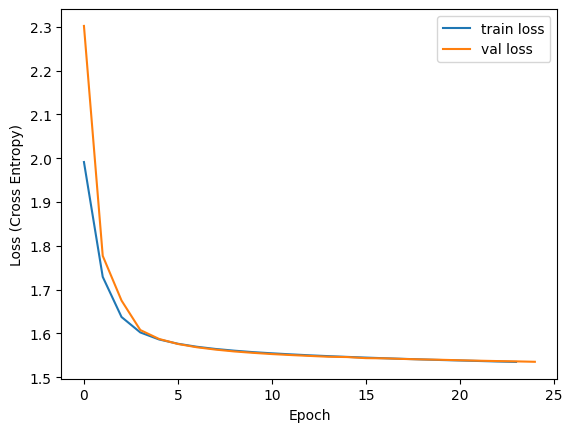

In [11]:
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.show()

visualizing shapes

In [12]:
print(val_batch_X.shape, val_batch_y.shape)  # 784 is 28*28
print(val_batch_y_probs.shape)  # inference from model
print(val_batch_y_pred.shape)  # probabilities converted

print("\n\nTo verify softmax converts inputs into probabilities (sum of which is 1), let's sum those probabilities and see if we get 1's: \n")
print(f'{val_batch_y_probs.sum(1)=}')

print(f'\n{val_batch_y_probs.sum(1).shape=}')

print('\n\nLets see argmax in action')
print("Here's one of the input to argmax\n")
test_idx = 15
print(val_batch_y_probs[test_idx].cpu())  # .cpu() brings a tensor back to cpu device from any other it might be on (like cuda)
print("\n\nHere's its output")
print(val_batch_y_pred[test_idx].cpu())

torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 10])
torch.Size([16])


To verify softmax converts inputs into probabilities (sum of which is 1), let's sum those probabilities and see if we get 1's: 

val_batch_y_probs.sum(1)=tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       device='cuda:0')

val_batch_y_probs.sum(1).shape=torch.Size([16])


Lets see argmax in action
Here's one of the input to argmax

tensor([2.9502e-10, 1.7637e-25, 1.3249e-08, 6.6339e-19, 1.8074e-11, 1.7071e-11,
        1.0000e+00, 3.1008e-20, 1.3269e-13, 2.3319e-16])


Here's its output
tensor(6)


Saving and loading the model

In [13]:
# you can load save the model's state dict like this
torch.save(model.state_dict(), 'MNIST_classifier.pt')  # take a look at the storage section if you're on colab

In [14]:
loaded_model = NN2Layer(28*28, 32, 10)  # just an empty model.
loaded_model.eval().to(device)

print('Before loading model')

with torch.no_grad():
  probs = loaded_model(val_batch_X)
  preds = probs.argmax(dim=1)

  print(f'{(preds==val_batch_y).sum()}/{len(preds)} correct')


print('After loading model')
loaded_model.load_state_dict(torch.load('MNIST_classifier.pt'))

with torch.no_grad():
  probs = loaded_model(val_batch_X)
  preds = probs.argmax(dim=1)

  print(f'{(preds==val_batch_y).sum()}/{len(preds)} correct')

Before loading model
1/16 correct
After loading model
16/16 correct


<ipython-input-14-3d8b10a6368e>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('MNIST_classifier.pt'))


END.